# florian wirtz stats

In [1]:
!pip install understatapi --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.1/138.1 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.21.0 requires requests>=2.27.1, but you have requests 2.25.1 which is incompatible.
google-colab 1.0.0 requires request

In [56]:
import pandas as pd
import understatapi

client = understatapi.UnderstatClient()

In [57]:
# Let's first get data from a league to retrieve a list of matches
league_data = client.league(league="Bundesliga").get_match_data(season="2023")
league_data[1]

{'id': '23066',
 'isResult': True,
 'h': {'id': '119', 'title': 'Bayer Leverkusen', 'short_title': 'LEV'},
 'a': {'id': '136', 'title': 'RasenBallsport Leipzig', 'short_title': 'RBL'},
 'goals': {'h': '3', 'a': '2'},
 'xG': {'h': '1.73279', 'a': '1.60393'},
 'datetime': '2023-08-19 13:30:00',
 'forecast': {'w': '0.4068', 'd': '0.2635', 'l': '0.3297'}}

In [58]:
# now we can use the match id to get the match data
shot_data = client.match(match=league_data[1]["id"]).get_shot_data()
shot_data['h'][6]

{'id': '533125',
 'minute': '47',
 'result': 'SavedShot',
 'X': '0.915',
 'Y': '0.5540000152587891',
 'xG': '0.34449008107185364',
 'player': 'Florian Wirtz',
 'h_a': 'h',
 'player_id': '8397',
 'situation': 'OpenPlay',
 'season': '2023',
 'shotType': 'LeftFoot',
 'match_id': '23066',
 'h_team': 'Bayer Leverkusen',
 'a_team': 'RasenBallsport Leipzig',
 'h_goals': '3',
 'a_goals': '2',
 'date': '2023-08-19 13:30:00',
 'player_assisted': 'Jonas Hofmann',
 'lastAction': 'Cross'}

In [59]:
# now let's get all of the data for a player, with this method you need to use the player_id
# This is literally every shot they ever took.

player_data = client.player(player='8397').get_shot_data()
player_data[0]

{'id': '363577',
 'minute': '55',
 'result': 'MissedShots',
 'X': '0.8319999694824218',
 'Y': '0.35700000762939454',
 'xG': '0.06335099786520004',
 'player': 'Florian Wirtz',
 'h_a': 'a',
 'player_id': '8397',
 'situation': 'OpenPlay',
 'season': '2019',
 'shotType': 'RightFoot',
 'match_id': '12660',
 'h_team': 'Freiburg',
 'a_team': 'Bayer Leverkusen',
 'h_goals': '0',
 'a_goals': '1',
 'date': '2020-05-29 18:30:00',
 'player_assisted': 'Kai Havertz',
 'lastAction': 'Pass'}

In [60]:
florian_df = pd.DataFrame(player_data)

In [61]:
florian_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,363577,55,MissedShots,0.8319999694824218,0.35700000762939454,0.06335099786520004,Florian Wirtz,a,8397,OpenPlay,2019,RightFoot,12660,Freiburg,Bayer Leverkusen,0,1,2020-05-29 18:30:00,Kai Havertz,Pass
1,363890,80,SavedShot,0.81,0.509000015258789,0.05127429962158203,Florian Wirtz,h,8397,OpenPlay,2019,RightFoot,12666,Bayer Leverkusen,Bayern Munich,2,4,2020-06-06 13:30:00,None,BallRecovery
2,363892,88,Goal,0.8969999694824219,0.38799999237060545,0.09709080308675766,Florian Wirtz,h,8397,OpenPlay,2019,LeftFoot,12666,Bayer Leverkusen,Bayern Munich,2,4,2020-06-06 13:30:00,Paulinho,Pass
3,364823,90,SavedShot,0.884000015258789,0.6229999923706054,0.09883850067853928,Florian Wirtz,h,8397,OpenPlay,2019,RightFoot,12684,Bayer Leverkusen,FC Cologne,3,1,2020-06-17 18:30:00,Nadiem Amiri,Pass
4,378216,60,BlockedShot,0.8180000305175781,0.4779999923706055,0.09313260018825531,Florian Wirtz,a,8397,OpenPlay,2020,RightFoot,14181,Wolfsburg,Bayer Leverkusen,0,0,2020-09-20 16:00:00,Lucas Alario,LayOff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,595318,6,BlockedShot,0.745999984741211,0.69,0.021731968969106674,Florian Wirtz,h,8397,OpenPlay,2024,RightFoot,27794,Bayer Leverkusen,Holstein Kiel,2,2,2024-10-05 13:30:00,Exequiel Palacios,Pass
166,595319,7,SavedShot,0.8490000152587891,0.7269999694824218,0.03836223855614662,Florian Wirtz,h,8397,OpenPlay,2024,RightFoot,27794,Bayer Leverkusen,Holstein Kiel,2,2,2024-10-05 13:30:00,Edmond Tapsoba,Pass
167,595322,8,BlockedShot,0.8669999694824219,0.46599998474121096,0.1313517987728119,Florian Wirtz,h,8397,OpenPlay,2024,RightFoot,27794,Bayer Leverkusen,Holstein Kiel,2,2,2024-10-05 13:30:00,Jonas Hofmann,Pass
168,595329,46,BlockedShot,0.785,0.664000015258789,0.025170011445879936,Florian Wirtz,h,8397,OpenPlay,2024,RightFoot,27794,Bayer Leverkusen,Holstein Kiel,2,2,2024-10-05 13:30:00,Exequiel Palacios,Pass


In [62]:
# Définir les dates de début et de fin pour le filtrage
start_date = '2023-08-01'
end_date = '2024-06-30'

# Filtrer le DataFrame entre les dates
filtered_df = florian_df[(florian_df['date'] >= start_date) & (florian_df['date'] <= end_date)]

# Afficher le DataFrame filtré
print(filtered_df)

         id minute       result                   X                    Y  \
78   533125     47    SavedShot               0.915   0.5540000152587891   
79   533128     63         Goal  0.8540000152587891   0.4470000076293945   
80   534921     32    SavedShot  0.8540000152587891   0.7330000305175781   
81   536193     18  BlockedShot  0.8059999847412109  0.46700000762939453   
82   536204     42    SavedShot  0.8590000152587891                0.655   
..      ...    ...          ...                 ...                  ...   
144  574392     82         Goal   0.860999984741211   0.5479999923706055   
145  574393     89         Goal   0.889000015258789  0.37099998474121093   
146  581534     71  BlockedShot  0.8590000152587891  0.41900001525878905   
147  581538     83  MissedShots  0.7559999847412109   0.6320000076293946   
148  581540     87    SavedShot  0.8859999847412109  0.40599998474121096   

                       xG         player h_a player_id   situation season  \
78    0.34

In [63]:
!pip install mplsoccer

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [65]:
filtered_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
78,533125,47,SavedShot,0.915,0.5540000152587891,0.34449008107185364,Florian Wirtz,h,8397,OpenPlay,2023,LeftFoot,23066,Bayer Leverkusen,RasenBallsport Leipzig,3,2,2023-08-19 13:30:00,Jonas Hofmann,Cross
79,533128,63,Goal,0.8540000152587891,0.4470000076293945,0.10295562446117401,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23066,Bayer Leverkusen,RasenBallsport Leipzig,3,2,2023-08-19 13:30:00,Jeremie Frimpong,Pass
80,534921,32,SavedShot,0.8540000152587891,0.7330000305175781,0.030057178810238838,Florian Wirtz,a,8397,FromCorner,2023,RightFoot,23080,Borussia M.Gladbach,Bayer Leverkusen,0,3,2023-08-26 16:30:00,Jonas Hofmann,Pass
81,536193,18,BlockedShot,0.8059999847412109,0.46700000762939453,0.052306532859802246,Florian Wirtz,h,8397,OpenPlay,2023,LeftFoot,23084,Bayer Leverkusen,Darmstadt,5,1,2023-09-02 13:30:00,Granit Xhaka,Pass
82,536204,42,SavedShot,0.8590000152587891,0.655,0.035432398319244385,Florian Wirtz,h,8397,SetPiece,2023,RightFoot,23084,Bayer Leverkusen,Darmstadt,5,1,2023-09-02 13:30:00,Exequiel Palacios,Pass


In [66]:
filtered_df.reset_index(drop=True, inplace=True)

In [67]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               71 non-null     object
 1   minute           71 non-null     object
 2   result           71 non-null     object
 3   X                71 non-null     object
 4   Y                71 non-null     object
 5   xG               71 non-null     object
 6   player           71 non-null     object
 7   h_a              71 non-null     object
 8   player_id        71 non-null     object
 9   situation        71 non-null     object
 10  season           71 non-null     object
 11  shotType         71 non-null     object
 12  match_id         71 non-null     object
 13  h_team           71 non-null     object
 14  a_team           71 non-null     object
 15  h_goals          71 non-null     object
 16  a_goals          71 non-null     object
 17  date             71 non-null     obje

In [68]:
# Changer les types de colonnes dans le DataFrame filtered_df
filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
filtered_df['result'] = filtered_df['result'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['X'] = filtered_df['X'].astype(float)  # Changez à float
filtered_df['Y'] = filtered_df['Y'].astype(float)  # Changez à float
filtered_df['xG'] = filtered_df['xG'].astype(float)  # Changez à float
filtered_df['player'] = filtered_df['player'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_a'] = filtered_df['h_a'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_id'] = filtered_df['player_id'].astype(int)  # Changez à int
filtered_df['situation'] = filtered_df['situation'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['season'] = filtered_df['season'].astype(int)  # Changez à int
filtered_df['shotType'] = filtered_df['shotType'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['match_id'] = filtered_df['match_id'].astype(int)  # Changez à int
filtered_df['h_team'] = filtered_df['h_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['a_team'] = filtered_df['a_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_goals'] = filtered_df['h_goals'].astype(int)  # Changez à int
filtered_df['a_goals'] = filtered_df['a_goals'].astype(int)  # Changez à int
filtered_df['date'] = filtered_df['date'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_assisted'] = filtered_df['player_assisted'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['lastAction'] = filtered_df['lastAction'].astype(str)  # Assurez-vous que c'est un objet


<ipython-input-68-eabf0c91d591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
<ipython-input-68-eabf0c91d591>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
<ipython-input-68-eabf0c91d591>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [69]:
filtered_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,533125,47,SavedShot,0.915,0.554,0.344490,Florian Wirtz,h,8397,OpenPlay,2023,LeftFoot,23066,Bayer Leverkusen,RasenBallsport Leipzig,3,2,2023-08-19 13:30:00,Jonas Hofmann,Cross
1,533128,63,Goal,0.854,0.447,0.102956,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23066,Bayer Leverkusen,RasenBallsport Leipzig,3,2,2023-08-19 13:30:00,Jeremie Frimpong,Pass
2,534921,32,SavedShot,0.854,0.733,0.030057,Florian Wirtz,a,8397,FromCorner,2023,RightFoot,23080,Borussia M.Gladbach,Bayer Leverkusen,0,3,2023-08-26 16:30:00,Jonas Hofmann,Pass
3,536193,18,BlockedShot,0.806,0.467,0.052307,Florian Wirtz,h,8397,OpenPlay,2023,LeftFoot,23084,Bayer Leverkusen,Darmstadt,5,1,2023-09-02 13:30:00,Granit Xhaka,Pass
4,536204,42,SavedShot,0.859,0.655,0.035432,Florian Wirtz,h,8397,SetPiece,2023,RightFoot,23084,Bayer Leverkusen,Darmstadt,5,1,2023-09-02 13:30:00,Exequiel Palacios,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,574392,82,Goal,0.861,0.548,0.473476,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23319,Bayer Leverkusen,Werder Bremen,5,0,2024-04-14 15:30:00,Exequiel Palacios,Chipped
67,574393,89,Goal,0.889,0.371,0.273815,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23319,Bayer Leverkusen,Werder Bremen,5,0,2024-04-14 15:30:00,Álex Grimaldo,Pass
68,581534,71,BlockedShot,0.859,0.419,0.085711,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23364,Bayer Leverkusen,Augsburg,2,1,2024-05-18 13:30:00,None,Rebound
69,581538,83,MissedShots,0.756,0.632,0.028741,Florian Wirtz,h,8397,OpenPlay,2023,RightFoot,23364,Bayer Leverkusen,Augsburg,2,1,2024-05-18 13:30:00,Granit Xhaka,Pass


In [70]:
filtered_df['X'] = filtered_df['X'] * 100
filtered_df['Y'] = filtered_df['Y'] * 100

<ipython-input-70-c088401e59fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['X'] = filtered_df['X'] * 100
<ipython-input-70-c088401e59fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Y'] = filtered_df['Y'] * 100


In [71]:
total_shots = filtered_df.shape[0]
total_goals = filtered_df[filtered_df['result'] == 'Goal'].shape[0]
total_xg = filtered_df['xG'].sum()
xg_per_shor = total_xg / total_shots
points_avg_distance = filtered_df['X'].mean()
actual_avg_distance = 120 - (filtered_df['X'] *1.2).mean()

In [72]:
actual_avg_distance

18.162253624284773

In [73]:
print(filtered_df['xG'].dtype)  # Vérifiez le type de xG
print(filtered_df['xG'].isnull().sum())  # Vérifiez les valeurs nulles


float64
0


In [74]:
background_color = '#0C0D0E'
# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/content/drive/MyDrive/football_projects/player_comparaison/Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [75]:
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

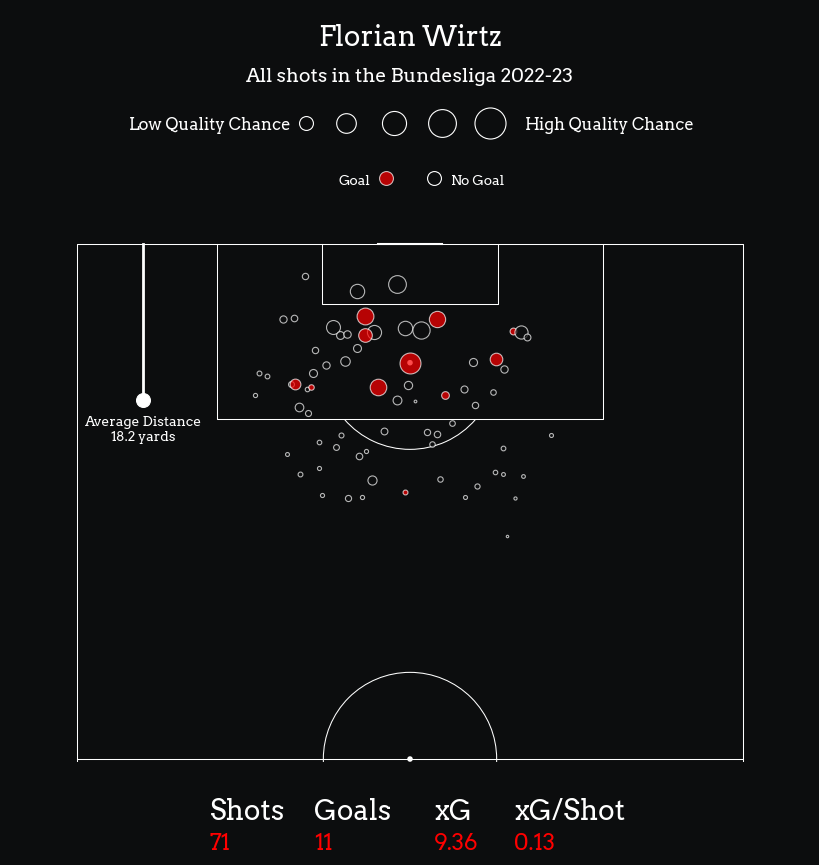

In [76]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Florian Wirtz',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Bundesliga 2022-23',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_avg_distance - 4,
    s=f'Average Distance\n{actual_avg_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in filtered_df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shor:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()


In [77]:
filtered_df.to_csv('/content/drive/MyDrive/football_projects/player_comparaison/wirtz_stats.csv')

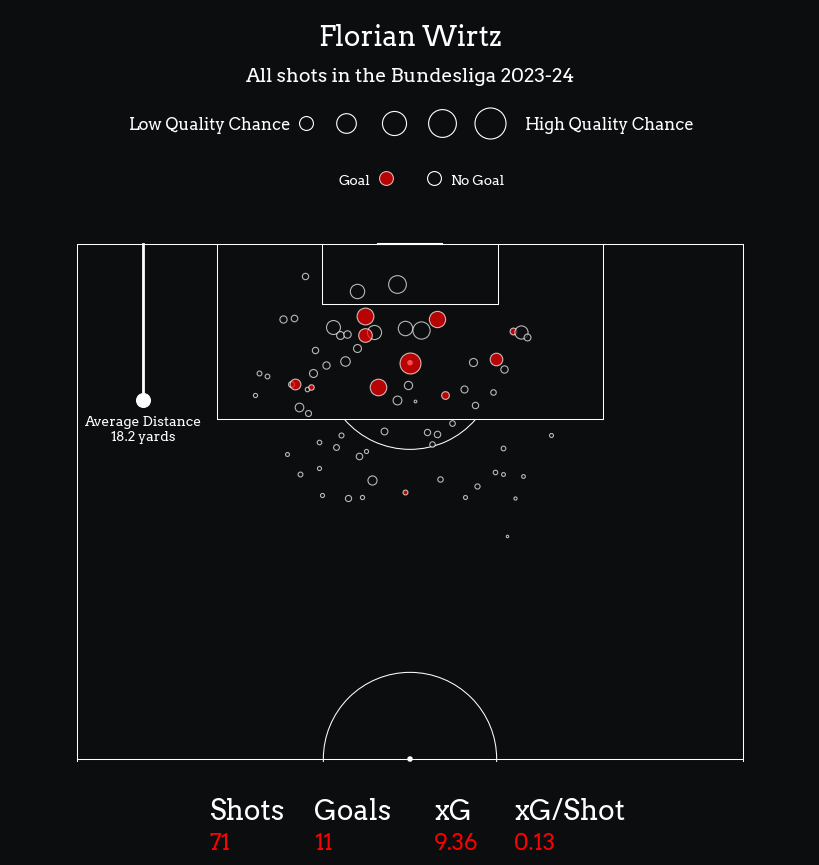

In [78]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Florian Wirtz',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Bundesliga 2023-24',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_avg_distance - 4,
    s=f'Average Distance\n{actual_avg_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in filtered_df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shor:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()


In [79]:
# Save the figure
fig.savefig('/content/drive/MyDrive/football_projects/player_comparaison/Florian_Wirtz_2023.png', facecolor=background_color, bbox_inches='tight')

# jamel musiala stats

In [80]:
# Let's first get data from a league to retrieve a list of matches
league_data = client.league(league="Bundesliga").get_match_data(season="2023")
league_data[0]

{'id': '23065',
 'isResult': True,
 'h': {'id': '123', 'title': 'Werder Bremen', 'short_title': 'WER'},
 'a': {'id': '117', 'title': 'Bayern Munich', 'short_title': 'BAY'},
 'goals': {'h': '0', 'a': '4'},
 'xG': {'h': '0.63974', 'a': '2.89704'},
 'datetime': '2023-08-18 18:30:00',
 'forecast': {'w': '0.0285', 'd': '0.0958', 'l': '0.8757'}}

In [81]:
# now we can use the match id to get the match data
shot_data = client.match(match=league_data[0]["id"]).get_shot_data()
shot_data['a'][2]

{'id': '532852',
 'minute': '18',
 'result': 'MissedShots',
 'X': '0.749000015258789',
 'Y': '0.5459999847412109',
 'xG': '0.035402167588472366',
 'player': 'Jamal Musiala',
 'h_a': 'a',
 'player_id': '8418',
 'situation': 'OpenPlay',
 'season': '2023',
 'shotType': 'RightFoot',
 'match_id': '23065',
 'h_team': 'Werder Bremen',
 'a_team': 'Bayern Munich',
 'h_goals': '0',
 'a_goals': '4',
 'date': '2023-08-18 18:30:00',
 'player_assisted': 'Kim Min-Jae',
 'lastAction': 'TakeOn'}

In [82]:
# now let's get all of the data for a player, with this method you need to use the player_id
# This is literally every shot they ever took.

player_data = client.player(player='8418').get_shot_data()
player_data[0]

{'id': '378415',
 'minute': '80',
 'result': 'Goal',
 'X': '0.8619999694824219',
 'Y': '0.6040000152587891',
 'xG': '0.10762699693441391',
 'player': 'Jamal Musiala',
 'h_a': 'h',
 'player_id': '8418',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'RightFoot',
 'match_id': '14173',
 'h_team': 'Bayern Munich',
 'a_team': 'Schalke 04',
 'h_goals': '8',
 'a_goals': '0',
 'date': '2020-09-18 18:30:00',
 'player_assisted': 'Robert Lewandowski',
 'lastAction': 'Pass'}

In [83]:
df = pd.DataFrame(player_data)

In [84]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,378415,80,Goal,0.8619999694824219,0.6040000152587891,0.10762699693441391,Jamal Musiala,h,8418,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Robert Lewandowski,Pass
1,382065,88,SavedShot,0.894000015258789,0.3579999923706055,0.0952685996890068,Jamal Musiala,a,8418,OpenPlay,2020,RightFoot,15172,Arminia Bielefeld,Bayern Munich,1,4,2020-10-17 16:30:00,Thomas Müller,Pass
2,383299,87,SavedShot,0.9169999694824219,0.49599998474121093,0.42401498556137085,Jamal Musiala,h,8418,FromCorner,2020,LeftFoot,15180,Bayern Munich,Eintracht Frankfurt,5,0,2020-10-24 13:30:00,Javi Martínez,TakeOn
3,383301,89,Goal,0.9269999694824219,0.534000015258789,0.5841919779777527,Jamal Musiala,h,8418,OpenPlay,2020,RightFoot,15180,Bayern Munich,Eintracht Frankfurt,5,0,2020-10-24 13:30:00,None,Rebound
4,387336,30,BlockedShot,0.9119999694824219,0.6659999847412109,0.06251540035009384,Jamal Musiala,h,8418,OpenPlay,2020,RightFoot,15203,Bayern Munich,Werder Bremen,1,1,2020-11-21 14:30:00,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,592191,87,SavedShot,0.8769999694824219,0.4129999923706055,0.12801143527030945,Jamal Musiala,a,8418,OpenPlay,2024,RightFoot,27773,Werder Bremen,Bayern Munich,0,5,2024-09-21 13:30:00,Leroy Sané,Pass
202,592194,90,BlockedShot,0.860999984741211,0.5370000076293945,0.11051059514284134,Jamal Musiala,a,8418,OpenPlay,2024,LeftFoot,27773,Werder Bremen,Bayern Munich,0,5,2024-09-21 13:30:00,Joshua Kimmich,Pass
203,594343,5,MissedShots,0.735,0.36400001525878906,0.01870955526828766,Jamal Musiala,h,8418,OpenPlay,2024,RightFoot,27784,Bayern Munich,Bayer Leverkusen,1,1,2024-09-28 16:30:00,Aleksandar Pavlovic,Pass
204,594349,35,MissedShots,0.8190000152587891,0.5590000152587891,0.05908861383795738,Jamal Musiala,h,8418,OpenPlay,2024,RightFoot,27784,Bayern Munich,Bayer Leverkusen,1,1,2024-09-28 16:30:00,Alphonso Davies,Pass


In [85]:
# Définir les dates de début et de fin pour le filtrage
start_date = '2023-08-01'
end_date = '2024-06-30'

# Filtrer le DataFrame entre les dates
jamel_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Afficher le DataFrame filtré
print(jamel_df)

         id minute       result                   X                    Y  \
132  532852     18  MissedShots   0.749000015258789   0.5459999847412109   
133  532858     39  BlockedShot   0.759000015258789   0.5279999923706055   
134  532860     43  BlockedShot  0.8469999694824218    0.620999984741211   
135  541452      2    SavedShot  0.8119999694824219                0.515   
136  545460     57  MissedShots  0.8690000152587891   0.3609999847412109   
137  545461     59         Goal               0.815    0.504000015258789   
138  545465     75         Goal  0.8880000305175781   0.6190000152587891   
139  547023     45    SavedShot                0.88                0.385   
140  547031     63    SavedShot               0.935                 0.32   
141  555051     44  MissedShots  0.8769999694824219  0.44400001525878907   
142  555052     46  BlockedShot  0.7759999847412109   0.6430000305175781   
143  555638      5  BlockedShot  0.7719999694824219    0.700999984741211   
144  555650 

In [86]:
# Changer les types de colonnes dans le DataFrame filtered_df
jamel_df['id'] = jamel_df['id'].astype(int)  # Changez à int
jamel_df['minute'] = jamel_df['minute'].astype(int)  # Changez à int
jamel_df['result'] = jamel_df['result'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['X'] = jamel_df['X'].astype(float)  # Changez à float
jamel_df['Y'] = jamel_df['Y'].astype(float)  # Changez à float
jamel_df['xG'] = jamel_df['xG'].astype(float)  # Changez à float
jamel_df['player'] = jamel_df['player'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['h_a'] = jamel_df['h_a'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['player_id'] = jamel_df['player_id'].astype(int)  # Changez à int
jamel_df['situation'] = jamel_df['situation'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['season'] = jamel_df['season'].astype(int)  # Changez à int
jamel_df['shotType'] = jamel_df['shotType'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['match_id'] = jamel_df['match_id'].astype(int)  # Changez à int
jamel_df['h_team'] = jamel_df['h_team'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['a_team'] = jamel_df['a_team'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['h_goals'] = jamel_df['h_goals'].astype(int)  # Changez à int
jamel_df['a_goals'] = jamel_df['a_goals'].astype(int)  # Changez à int
jamel_df['date'] = jamel_df['date'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['player_assisted'] = jamel_df['player_assisted'].astype(str)  # Assurez-vous que c'est un objet
jamel_df['lastAction'] = jamel_df['lastAction'].astype(str)  # Assurez-vous que c'est un objet


<ipython-input-86-4e6de6337aa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jamel_df['id'] = jamel_df['id'].astype(int)  # Changez à int
<ipython-input-86-4e6de6337aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jamel_df['minute'] = jamel_df['minute'].astype(int)  # Changez à int
<ipython-input-86-4e6de6337aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [87]:
jamel_df['X'] = jamel_df['X'] * 100
jamel_df['Y'] = jamel_df['Y'] * 100

<ipython-input-87-6e576516c97f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jamel_df['X'] = jamel_df['X'] * 100
<ipython-input-87-6e576516c97f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jamel_df['Y'] = jamel_df['Y'] * 100


In [88]:
total_shots = jamel_df.shape[0]
total_goals = jamel_df[jamel_df['result'] == 'Goal'].shape[0]
total_xg = jamel_df['xG'].sum()
xg_per_shor = total_xg / total_shots
points_avg_distance = jamel_df['X'].mean()
actual_avg_distance = 120 - (jamel_df['X'] *1.2).mean()

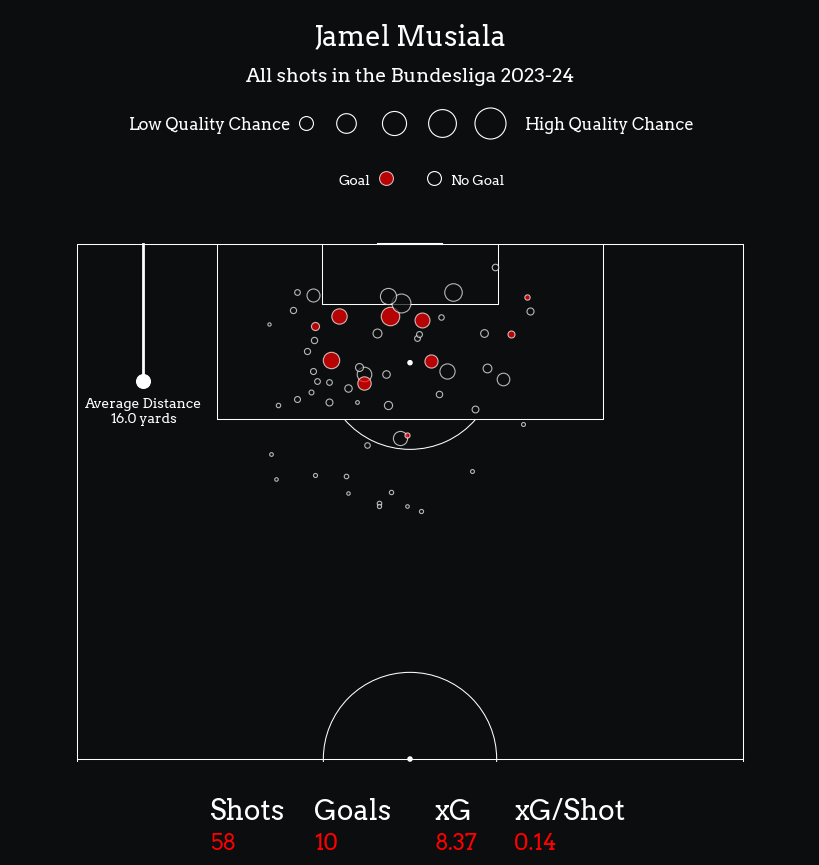

In [89]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Jamel Musiala',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Bundesliga 2023-24',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_avg_distance - 4,
    s=f'Average Distance\n{actual_avg_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in jamel_df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shor:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()


In [90]:
jamel_df.to_csv('/content/drive/MyDrive/football_projects/player_comparaison/musiala_stats.csv')

In [91]:
# Save the figure
fig.savefig('/content/drive/MyDrive/football_projects/player_comparaison/Jamel_Musiala_2023.png', facecolor=background_color, bbox_inches='tight')